# Simple Linear Regression

### Problem Statement :- 

    - Build a model to predict Employee churn out rate

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Data Understanding and Preparation

In [4]:
import pandas as pd
import numpy as np
emp = pd.read_csv ("~/desktop/Digi 360/Module 6/DataSets-4/emp_data.csv")
emp.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [5]:
##let's describe the DF
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [6]:
#Median for Salary Hike
print(emp.Salary_hike.median())

1675.0


In [7]:
#Median for churn out rate
print(emp.Churn_out_rate.median())

71.0


Here, the mean is greater than the median for Salary Hike so the distribution is right skewed. 

Similarly, the mean is greater than the median for churn out rate so the distribution is right skewed. 


### Visualization

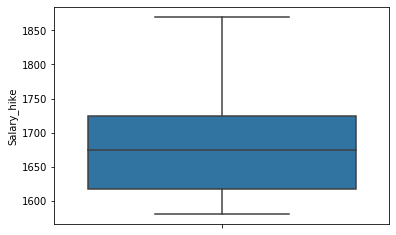

In [10]:
##Boxplot for salary hike
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=emp['Salary_hike'])
plt.show()

In [11]:
#Finding outliers for Salary_hike
Q1 =  emp['Salary_hike'].quantile(0.25)
Q3 =  emp['Salary_hike'].quantile(0.75)
IQR = Q3 - Q1
Outlr = emp[(emp['Salary_hike'] < Q1-1.5*IQR ) | (emp['Salary_hike'] > Q3+1.5*IQR)]['Salary_hike']
print("Outliers:", Outlr)

Outliers: Series([], Name: Salary_hike, dtype: int64)


So, there are no outliers.

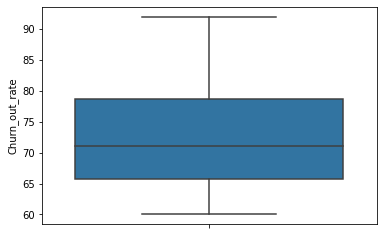

In [12]:
#Boxplot for Churn_out_rate
import seaborn as sns
sns.boxplot(y=emp['Churn_out_rate'])
plt.show()

In [13]:
###Finding outliers for Churn_out_rate
Q1 =  emp['Churn_out_rate'].quantile(0.25)
Q3 =  emp['Churn_out_rate'].quantile(0.75)
IQR = Q3 - Q1
Outlr = emp[(emp['Churn_out_rate'] < Q1-1.5*IQR ) | (emp['Churn_out_rate'] > Q3+1.5*IQR)]['Churn_out_rate']
print("Outliers:", Outlr)


Outliers: Series([], Name: Churn_out_rate, dtype: int64)


So, there are no outliers.

Let’s draw scatter diagram to see the relationship between salary hike and churn out rate.

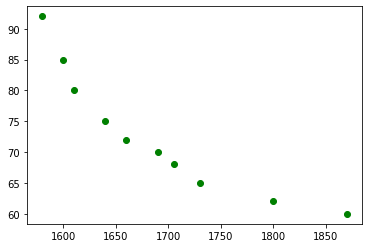

In [15]:
import matplotlib.pylab as plt
plt.scatter(x=emp['Salary_hike'],y=emp['Churn_out_rate'],color='green')
plt.show()

### Finding the correlation

In [16]:
#Finding the correlation coefficient
np.corrcoef(emp.Salary_hike,emp.Churn_out_rate)

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

Here the correlation coefficient value is 0.91 which is greater than 0.85. So, the relationship between salary hike and churn out rate is strong. 

### Model Building

In [17]:
#Building the model
import statsmodels.formula.api as smf
model = smf.ols('Churn_out_rate ~ Salary_hike', data = emp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           0.000239
Time:                        02:32:07   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, the linear equation is 
y^ = 244.3649 – 0.1015x. Here y^ = churn out rate and x = salary hike. 


Here p value is less than 0.05 so we reject the null hypothesis. That means there is significant correlation between salary hike and churn out rate.

Here we also can see R-squared value is 0.831 which is less than 0.85. Hence our model is not good and we need further transformations. 


### Model Evolution

In [18]:
pred = model.predict(pd.DataFrame(emp['Salary_hike']))
pred

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

In [19]:
#99% CI 
print(model.conf_int(0.01))

                      0           1
Intercept    152.588569  336.141253
Salary_hike   -0.155821   -0.047265


In [20]:
#Finding RMSE
res = emp.Churn_out_rate - pred
squares = res * res
mse = np.mean(squares)
rmse = np.sqrt(mse)
rmse

3.997528462337793

Since our R^2 value 0.831 which is less than 0.85, we need to go for transformations.

### Log Model

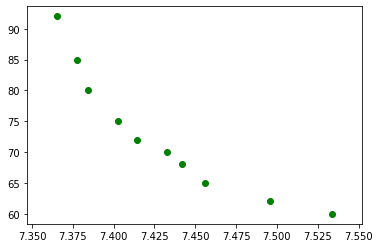

In [21]:
#let's build log model
# x = log(Salary_hike) and y = Churn_out_rate
plt.scatter(x=np.log(emp['Salary_hike']),y=emp['Churn_out_rate'],color='green')
plt.show()

In [22]:
#Finding the correlation coefficient
np.corrcoef(np.log(emp.Salary_hike),emp.Churn_out_rate)

array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

In [23]:
#Building the model
model1 = smf.ols('Churn_out_rate ~ np.log(Salary_hike)', data = emp).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           0.000153
Time:                        02:35:04   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we also can see R-squared value is 0.849 which is less than 0.85. Hence our model is not so good and we need further transformations. 

### Log Model Evolution

In [24]:
pred1 = model1.predict(pd.DataFrame(emp['Salary_hike']))
pred1

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

In [25]:
#99% CI 
print(model1.conf_int(0.01))

                              0            1
Intercept            725.806856  2037.105529
np.log(Salary_hike) -264.347078   -87.872392


In [26]:
#Finding RMSE
res1 = emp.Churn_out_rate - pred1
squares1 = res1 * res1
mse1 = np.mean(squares1)
rmse1 = np.sqrt(mse1)
rmse1

3.7860036130227708

So, we can conclude that our predicted values are 3.79 points deviated from actual values.

Since our R^2 value 0.849 which is less than 0.85, we need to go for transformations.


### Exponential Model

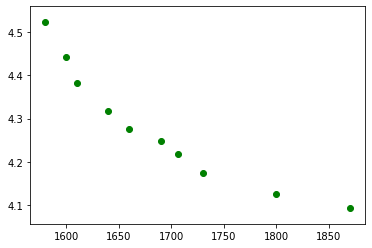

In [27]:
#let's build Exponential model
# x = Salary_hike and y = log(Churn_out_rate)
plt.scatter(x=emp['Salary_hike'],y=np.log(emp['Churn_out_rate']),color='green')
plt.show()

In [28]:
#Finding the correlation coefficient
np.corrcoef(emp.Salary_hike,np.log(emp.Churn_out_rate))

array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

In [29]:
##Building the model
model2 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike', data = emp).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Wed, 24 Jun 2020   Prob (F-statistic):           7.38e-05
Time:                            02:37:08   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we also can see R-squared value is 0.874 which is greater than 0.85. Hence our model is good and we don’t need further transformations. 

In [30]:
pred2_log = model2.predict(pd.DataFrame(emp['Salary_hike']))
pred2_log

0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [31]:
pred2 = np.exp(pred2_log)
pred2


0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

In [32]:
#99% CI 
print(model2.conf_int(0.01))

                    0         1
Intercept    5.572635  7.703965
Salary_hike -0.002027 -0.000766


In [33]:
#Finding RMSE
res2 = emp.Churn_out_rate - pred2
squares2 = res2 * res2
mse2 = np.mean(squares2)
rmse2 = np.sqrt(mse2)
rmse2

3.5415493188215756

So, we can conclude that our predicted values are 3.54 points deviated from actual values.

### Conclusion:- 

    - Built the model with different transformations
    - R^2 value for linear model is 0.83
    - R^2 value for log model is 0.85
    - R^2 value for exponential model is 0.87
    - We can conclude that the exponential model is the final model